In [1]:
# Importar módulos
import requests
import pandas as pd
import os
from bs4 import BeautifulSoup
import json
import time, random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sitio = "https://www.solotodo.cl/"

In [ ]:
https://publicapi.solotodo.com/products/44497/pricing_history/
https://publicapi.solotodo.com/products/44497/pricing_history/?timestamp_after=2021-11-10T03:00:00.000Z&timestamp_before=2021-12-10T03:00:00.000Z

# Funciones

In [151]:
api1 = lambda x:"https://publicapi.solotodo.com/categories/"+ str(x)+"/browse/"

def getCatProducts(url):
    payload = ""
    headers = ""
    querystring = {"page_size":200, "page":1}
    response = requests.request("GET", url, data=payload, headers=headers, params=querystring)
    cat = response.json()

    results = cat["results"]
    N = cat["count"]/querystring["page_size"]

    if N>1:
        N = int(N)+1
        for n in range(2, N+1): 
            print(n)
            querystring["page"] = n
            response = requests.request("GET", url, data=payload, headers=headers, params=querystring)
            cat = response.json()
            results += cat["results"]
    return results

def transformProd(listjson):
    dfs = []
    for r in listjson:
        for p in r["product_entries"]:
            df = pd.json_normalize(p["product"])
            dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

def getPriceHist(list_urls,list_cdgs, time_interval):
    payload = ""
    headers = ""
    ljson = []
    for i, (url_, cdg) in enumerate(zip(list_urls,list_cdgs)):
        url = url_ + "pricing_history/"
        time.sleep(0.2)
        if i%50==0:print(i, len(list_urls))
        response = requests.request("GET", url, data=payload, headers=headers, params=time_interval)
        cat = response.json()
        ljson.append([cat, cdg])
    return ljson

def transformHist(listjson):
    DFs = []
    Id = []
    for p in listjson:
        for t in p[0]:
            df = pd.json_normalize(t["pricing_history"])
            DFs.append(df)
            Id+= [p[1]]*len(df)
    Hist = pd.concat(DFs, ignore_index=True)
    Hist[["normal_price", "offer_price"]]= Hist[["normal_price", "offer_price"]].apply(pd.to_numeric)
    Hist["timestamp"]= Hist["timestamp"].apply(pd.to_datetime)
    Hist["id_p"] = Id
    return Hist

# GET STORES

In [88]:
api_stores = "https://publicapi.solotodo.com/stores/"
payload = ""
headers = ""
querystring = ""

response = requests.request("GET", api_stores, data=payload, headers=headers, params=querystring)
cat = response.json()
stores = pd.json_normalize(cat)
stores.to_csv("/content/drive/MyDrive/IPC Bienes/Datos (Scraper)/storesSLT.csv")

# GET CATEGORY PRODUCTS

In [145]:
"""
cdg | category
1     notebooks
6     celulares
11    televisores
15    refrigeradores
16    impresoras
19    lavadoras y secadoras

"""

url = api1(1)
results = getCatProducts(url)
products = transformProd(results)

print(products.shape)

2
3
4
5
6
7
(1340, 336)


In [146]:
# products.to_csv("/content/drive/MyDrive/IPC Bienes/Datos (Scraper)/celulares.csv")
# products.to_csv("/content/drive/MyDrive/IPC Bienes/Datos (Scraper)/notebooks.csv")

In [ ]:
['Marca', 'Modelo' , 'Tienda', 'Contrato', 'Precio Tarjeta', 'Precio Normal', 'Pantalla', 'Memoria interna', 'RAM', 'Cámara principal', 'Cámara frontal', 'Memoria externa', 'Batería', 'Sistema Operativo', 'Procesador', 'CPU', 'GPU', 'Peso', 'Tamaño', 'Conectividad', 'Potencia carga', 'Conector audifonos', 'Wi-Fi', 'GPS', 'NFC', 'Bluetooth', 'Lector huellas']
['Marca', 'Modelo' ,  'Pantalla', 'Memoria interna', 'RAM', 'Cámara principal', 'Cámara frontal', 'Memoria externa', 'Batería', 'Sistema Operativo', 'Procesador', 'CPU', 'GPU', 'Peso', 'Tamaño', 'Conectividad', 'Potencia carga', 'Conector audifonos', 'Wi-Fi', 'GPS', 'NFC', 'Bluetooth', 'Lector huellas']
['brand_id', 'name', 'specs.screen_resolution_unicode', "specs.internal_storage_unicode" 	,"specs.ram_unicode", "specs.back_camera", "specs.front_camera",]

In [ ]:
products

# GET HISTORY

In [152]:
querystring = {"timestamp_after":"2021-12-09T00:00:00.000Z",
               "timestamp_before":"2021-12-15T00:00:00.000Z"}
results = getPriceHist(products["url"],products["id"], querystring)
history = transformHist(results)

print(history.shape)

0 1340
50 1340
100 1340
150 1340
200 1340
250 1340
300 1340
350 1340
400 1340
450 1340
500 1340
550 1340
600 1340
650 1340
700 1340
750 1340
800 1340
850 1340
900 1340
950 1340
1000 1340
1050 1340
1100 1340
1150 1340
1200 1340
1250 1340
1300 1340
(21450, 9)


In [153]:
history

,url,id,entity,timestamp,is_available,normal_price,offer_price,cell_monthly_payment,id_p
0,https://publicapi.solotodo.com/entity_historie...,221330168,https://publicapi.solotodo.com/entities/656522/,2021-12-10 04:41:55.265050+00:00,True,149990.0,129990.0,None,115419
1,https://publicapi.solotodo.com/entity_historie...,221450410,https://publicapi.solotodo.com/entities/656522/,2021-12-11 04:43:06.606111+00:00,True,149990.0,129990.0,None,115419
2,https://publicapi.solotodo.com/entity_historie...,221569892,https://publicapi.solotodo.com/entities/656522/,2021-12-12 04:42:55.757013+00:00,True,149990.0,129990.0,None,115419
3,https://publicapi.solotodo.com/entity_historie...,221674281,https://publicapi.solotodo.com/entities/656522/,2021-12-13 04:43:03.261052+00:00,True,149990.0,129990.0,None,115419
4,https://publicapi.solotodo.com/entity_historie...,221802054,https://publicapi.solotodo.com/entities/656522/,2021-12-14 05:15:11.059105+00:00,True,149990.0,129990.0,None,115419
...,...,...,...,...,...,...,...,...,...
21445,https://publicapi.solotodo.com/entity_historie...,221227873,https://publicapi.solotodo.com/entities/449841/,2021-12-09 05:20:54.825860+00:00,True,4599990.0,4599990.0,None,88514
21446,https://publicapi.solotodo.com/entity_historie...,221348137,https://publicapi.solotodo.com/entities/449841/,2021-12-10 05:25:18.155686+00:00,True,4599990.0,4599990.0,None,88514
21447,https://publicapi.solotodo.com/entity_historie...,221464912,https://publicapi.solotodo.com/entities/449841/,2021-12-11 05:17:40.723177+00:00,True,4599990.0,4599990.0,None,88514
21448,https://publicapi.solotodo.com/entity_historie...,221684504,https://publicapi.solotodo.com/entities/449841/,2021-12-13 05:27:11.992457+00:00,True,4599990.0,4599990.0,None,88514


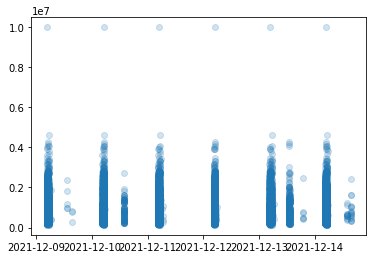

In [154]:
import matplotlib.pyplot as plt

plt.scatter(history.timestamp,history.normal_price, alpha=0.2)
plt.show()